In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
Upregulated = pd.read_csv("Upregulated  in All groups.csv")
Upregulated.columns = ["Gene", "WNT", "SHH", "Group3", "Group4"]

In [9]:
Upregulated

,Gene,WNT,SHH,Group3,Group4
0,LOC645188,-25.138418,-16.112864,-16.273388,-14.149642
1,LOC107984512,-23.851807,-13.026184,-22.798826,-19.382450
2,HOXC11,-23.260342,-15.255320,-22.229793,-21.181761
3,HOXA11,-23.023957,-22.589415,-19.550418,-18.897854
4,LOC105379457,-22.050865,-16.935407,-19.968758,-14.928228
...,...,...,...,...,...
4701,SMC3,NaN,NaN,NaN,-1.513471
4702,DLG5,NaN,NaN,NaN,-1.509067
4703,PPM1D,NaN,NaN,NaN,-1.507403
4704,TMEM30A-DT,NaN,NaN,NaN,-1.507211


In [11]:
Downregulated = pd.read_csv("Down Regulated in All Groups.csv")
Downregulated.columns = ["Gene", "WNT", "SHH", "Group3", "Group4"]

In [13]:
Downregulated

,Gene,WNT,SHH,Group3,Group4
0,LOC105375557,18.021033,NaN,NaN,NaN
1,LINC02770,16.795967,NaN,NaN,NaN
2,LINC01544,10.451106,5.146671,7.982552,NaN
3,OPALIN,9.955665,7.704173,6.993127,6.316625
4,ZP2,9.897708,5.800756,8.552776,6.512445
...,...,...,...,...,...
4578,FGGY,NaN,NaN,NaN,1.511471
4579,BAG4,NaN,NaN,NaN,1.509267
4580,MMP24-AS1-EDEM2,NaN,NaN,NaN,1.505860
4581,GBP3,NaN,NaN,NaN,1.501408


In [15]:
result = Upregulated.set_index('Gene').combine_first(Downregulated.set_index('Gene')).reset_index()
result

,Gene,WNT,SHH,Group3,Group4
0,A4GALT,-3.844745,-5.701030,NaN,NaN
1,AACSP1,NaN,NaN,-4.061089,NaN
2,AAK1,2.470671,1.764175,1.775441,NaN
3,AANAT,NaN,NaN,-4.752038,NaN
4,AARD,NaN,NaN,4.759529,5.028761
...,...,...,...,...,...
9202,ZSCAN31,1.999520,NaN,NaN,NaN
9203,ZSWIM4,-1.771978,-2.308854,-2.359299,-2.661616
9204,ZWILCH,NaN,-1.784982,NaN,NaN
9205,ZWINT,-3.997306,-4.017648,-3.160781,-3.186873


In [17]:
#result.to_csv("Significant Genes in All group.csv", index = False)

In [20]:
significant = result

In [22]:
significant

,Gene,WNT,SHH,Group3,Group4
0,A4GALT,-3.844745,-5.701030,NaN,NaN
1,AACSP1,NaN,NaN,-4.061089,NaN
2,AAK1,2.470671,1.764175,1.775441,NaN
3,AANAT,NaN,NaN,-4.752038,NaN
4,AARD,NaN,NaN,4.759529,5.028761
...,...,...,...,...,...
9202,ZSCAN31,1.999520,NaN,NaN,NaN
9203,ZSWIM4,-1.771978,-2.308854,-2.359299,-2.661616
9204,ZWILCH,NaN,-1.784982,NaN,NaN
9205,ZWINT,-3.997306,-4.017648,-3.160781,-3.186873


In [24]:
significant_actual = -1 * significant

In [31]:
significant_actual.index = significant.iloc[:,0]
significant_actual = significant_actual.drop("Gene", axis=1)

In [33]:
significant_actual

,WNT,SHH,Group3,Group4
Gene,,,,
A4GALT,3.844745,5.701030,NaN,NaN
AACSP1,NaN,NaN,4.061089,NaN
AAK1,-2.470671,-1.764175,-1.775441,NaN
AANAT,NaN,NaN,4.752038,NaN
AARD,NaN,NaN,-4.759529,-5.028761
...,...,...,...,...
ZSCAN31,-1.999520,NaN,NaN,NaN
ZSWIM4,1.771978,2.308854,2.359299,2.661616
ZWILCH,NaN,1.784982,NaN,NaN


In [35]:
significant_actual.fillna(0, inplace=True)

In [37]:
significant_actual

,WNT,SHH,Group3,Group4
Gene,,,,
A4GALT,3.844745,5.701030,0.000000,0.000000
AACSP1,0.000000,0.000000,4.061089,0.000000
AAK1,-2.470671,-1.764175,-1.775441,0.000000
AANAT,0.000000,0.000000,4.752038,0.000000
AARD,0.000000,0.000000,-4.759529,-5.028761
...,...,...,...,...
ZSCAN31,-1.999520,0.000000,0.000000,0.000000
ZSWIM4,1.771978,2.308854,2.359299,2.661616
ZWILCH,0.000000,1.784982,0.000000,0.000000


In [39]:
mask_wnt = (significant_actual.iloc[:, 1:] <= 0).all(axis=1)
wnt_df = significant_actual[mask_wnt]
WNT_up = wnt_df.sort_values(by='WNT', ascending=False)
WNT_up.to_csv("WNT UP significant.csv", index=True)

In [41]:
mask_shh = (significant_actual.iloc[:,[0,2,3]] <= 0).all(axis=1)
shh_df = significant_actual[mask_shh]
SHH_up = shh_df.sort_values(by='SHH', ascending=False)
SHH_up.to_csv("SHH UP significant.csv", index=True)


In [43]:
mask_gr3 =  (significant_actual.iloc[:,[0,1,3]] <= 0).all(axis=1)
gr3_df = significant_actual[mask_gr3]
gr3_up = gr3_df.sort_values(by='Group3', ascending=False)
gr3_up.to_csv("Group3 UP significant.csv", index=True)


In [45]:
mask_gr4 =  (significant_actual.iloc[:,[0,1,2]] <= 0).all(axis=1)
gr4_df = significant_actual[mask_gr4]
gr4_up = gr4_df.sort_values(by='Group4', ascending=False)
gr4_up.to_csv("Group4 UP significant.csv", index=True)

In [55]:
WNT_up[0:10]

,WNT,SHH,Group3,Group4
Gene,,,,
LINC02178,10.636757,0.0,0.0,0.0
HOXD13,10.285897,0.0,0.0,0.0
HOXD11,10.238898,0.0,0.0,0.0
ISL1-DT,9.966810,0.0,0.0,0.0
HOXD10,9.499620,0.0,0.0,0.0
LINC02898,9.187925,0.0,0.0,0.0
HOXC-AS2,8.631265,0.0,0.0,0.0
DDC-AS1,8.322770,0.0,0.0,0.0
TRDD3,8.211492,0.0,0.0,0.0


In [57]:
SHH_up[0:10]

,WNT,SHH,Group3,Group4
Gene,,,,
IGHEP1,0.0,12.925791,0.0,0.0
LOC107987211,0.0,10.405669,0.0,0.0
MIR8071-1,0.0,10.314191,0.0,0.0
LOC105378184,0.0,10.097147,0.0,0.0
IGHE,0.0,9.389093,0.0,0.0
LOC105378187,0.0,9.231119,0.0,0.0
IGHJ3,0.0,8.996809,0.0,0.0
KRT14,0.0,8.935773,0.0,0.0
LOC107986551,0.0,8.909966,0.0,0.0


In [59]:
gr3_up[0:10]

,WNT,SHH,Group3,Group4
Gene,,,,
LOC102724419,0.0,0.0,10.537483,0.0
LINC01467,0.0,0.0,10.026080,0.0
GALP,0.0,0.0,9.038022,0.0
LOC105372932,0.0,0.0,8.793558,0.0
TYR,0.0,0.0,8.778784,0.0
CLC,0.0,0.0,8.746636,0.0
BPIFB4,0.0,0.0,8.520007,0.0
LOC107984408,0.0,0.0,8.519916,0.0
LOC107985462,0.0,0.0,8.483375,0.0


In [61]:
gr4_up[0:10]

,WNT,SHH,Group3,Group4
Gene,,,,
LINC01419,0.0,0.0,0.0,9.548509
FOXA2,0.0,0.0,0.0,9.440030
LINC00261,0.0,0.0,0.0,8.693465
HMX3,0.0,0.0,0.0,8.364982
HOXC13-AS,0.0,0.0,0.0,8.246899
HOXB13,0.0,0.0,0.0,8.180425
LINC03017,0.0,0.0,0.0,8.135805
LOC105378998,0.0,0.0,0.0,7.924811
LOC102724749,0.0,0.0,0.0,7.810388


In [63]:
Group_wise = pd.concat([WNT_up[0:10],SHH_up[0:10],gr3_up[0:10],gr4_up[0:10]])

In [65]:
Group_wise

,WNT,SHH,Group3,Group4
Gene,,,,
LINC02178,10.636757,0.000000,0.000000,0.000000
HOXD13,10.285897,0.000000,0.000000,0.000000
HOXD11,10.238898,0.000000,0.000000,0.000000
ISL1-DT,9.966810,0.000000,0.000000,0.000000
HOXD10,9.499620,0.000000,0.000000,0.000000
LINC02898,9.187925,0.000000,0.000000,0.000000
HOXC-AS2,8.631265,0.000000,0.000000,0.000000
DDC-AS1,8.322770,0.000000,0.000000,0.000000
TRDD3,8.211492,0.000000,0.000000,0.000000


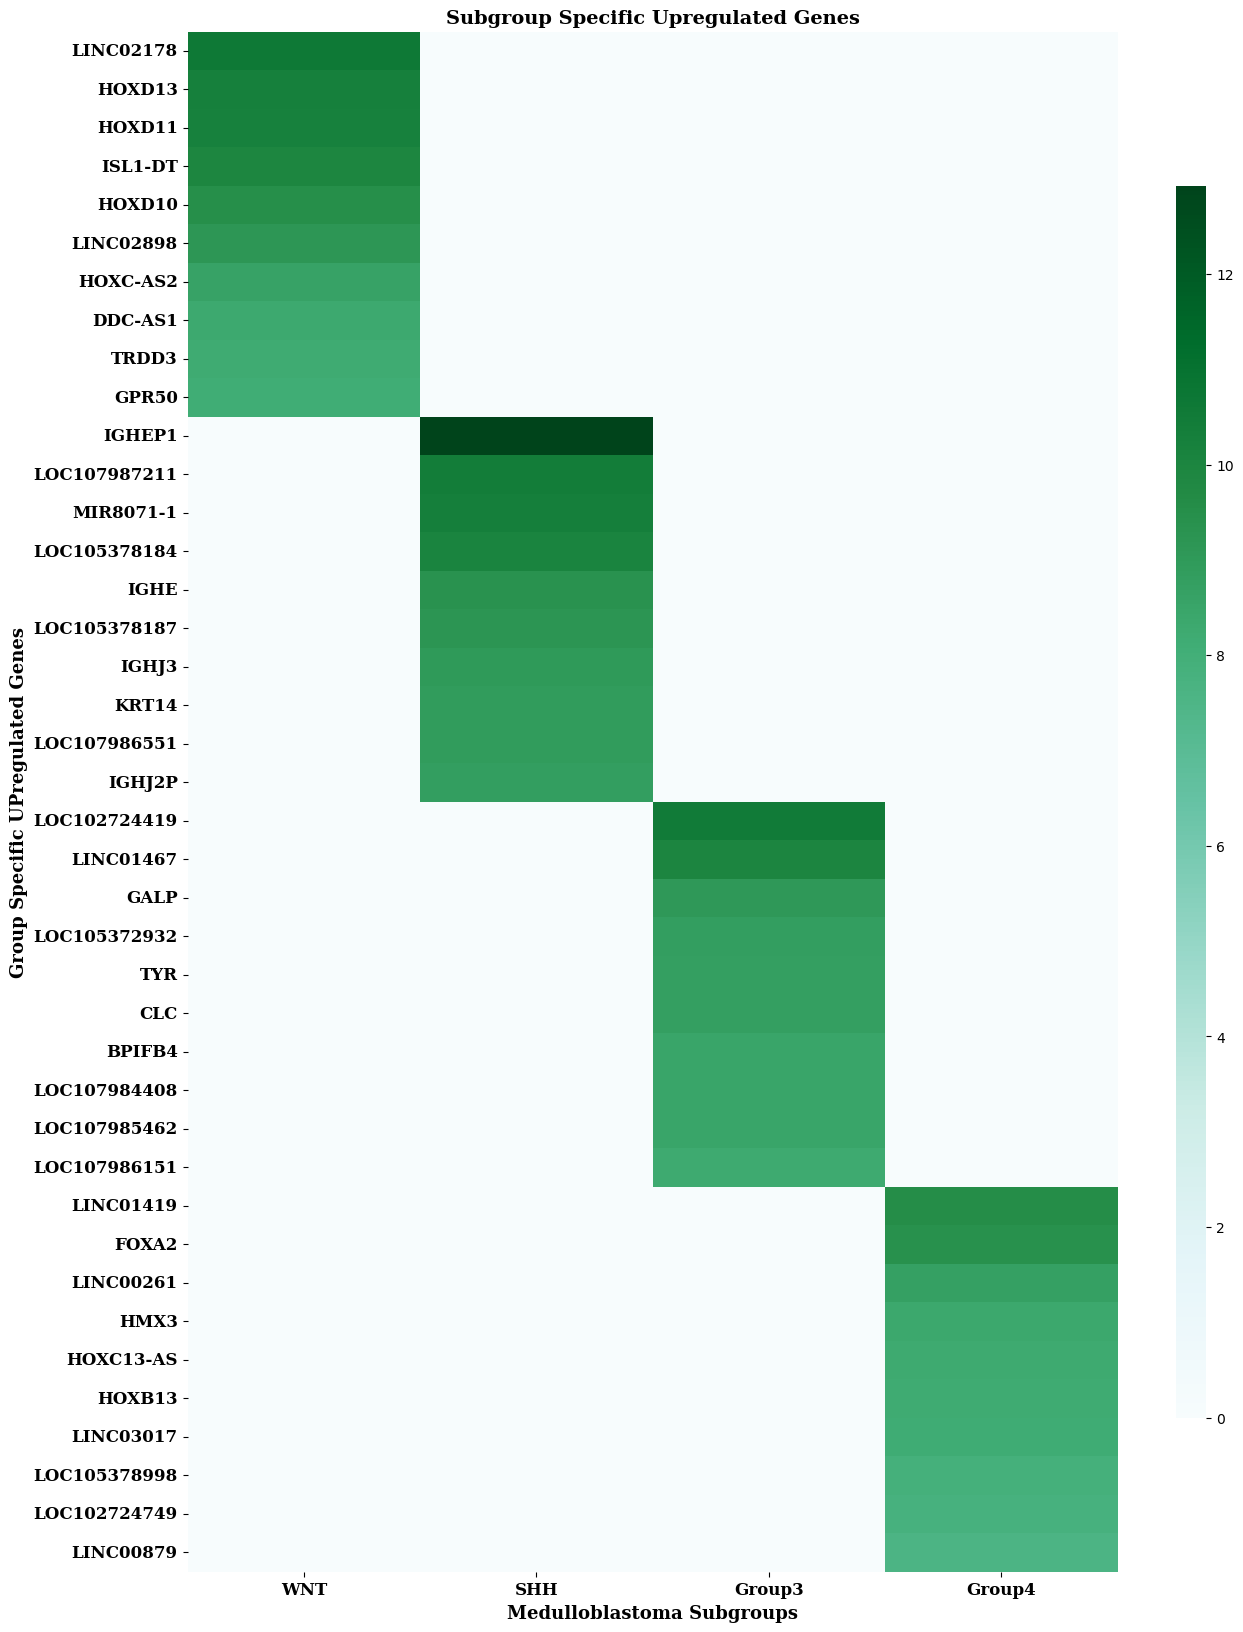

In [74]:
plt.figure(figsize=(15,20))
sns.heatmap(Group_wise,
           cmap="BuGn",
           cbar_kws={"shrink": 0.8, "aspect": 40},
           )
plt.xlabel("Medulloblastoma Subgroups", fontsize = 13, fontfamily = "serif", fontweight = "bold");
plt.ylabel("Group Specific UPregulated Genes", fontsize = 13, fontfamily = "serif", fontweight = "bold");
plt.title("Subgroup Specific Upregulated Genes",fontsize = 14, fontfamily = "serif", fontweight = "bold");
plt.xticks(fontsize=12, fontweight='bold',fontfamily = "serif");
plt.yticks(fontsize=12, fontweight='bold',fontfamily = "serif");
plt.savefig("Plots/03_Group_Wise_Upregulated_proteins.png", dpi = 512)